In [1]:
## Due to memory issues I had to restart my laptop. Instead of rerunning all my previous code, I will import
# the necessary dataframe and libraries in order to continue where I left off.

TABLE OF CONTENTS PART 3

KEY QUESTIONS CONTINUED

5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.
    - 5c. Are there differences in ordering habits based on a customer’s region?
    - 5d. Is there a connection between age and family status in terms of ordering habits?
      - Create an age_group_family_status customer profile.
      - Visualization for the Number of orders per day for each age-group/family status.
    - 5e. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.
      - Average price of orders for age_group_fam_status profile.
      - Visualization for the Average Amount Spent by Age Group and Family Status.
      - Average price of orders for age_group_class_level profile.
      - Visualization for the Average Amount Spent by Age Group and Class Level.
      - Most popular product by age group and family status.
      - Visulaizations for most popular product by age group and family status.
      - Most bought product by age flag and Visualization.
      - Most bought product by age group and class level with visualization.
      - Ordering habits by price range for age_group_family_status and age_group_class_level


# Key Questions

## Import dataframe, libraries and define path:

In [2]:
## Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Define path

path = r'/Users/aislingm/Documents/02-08-2023 Instacart Basket Analysis'

## Import Dataframe

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_latest.pkl'))

### 5.c Are there differences in ordering habits based on a customer's region?

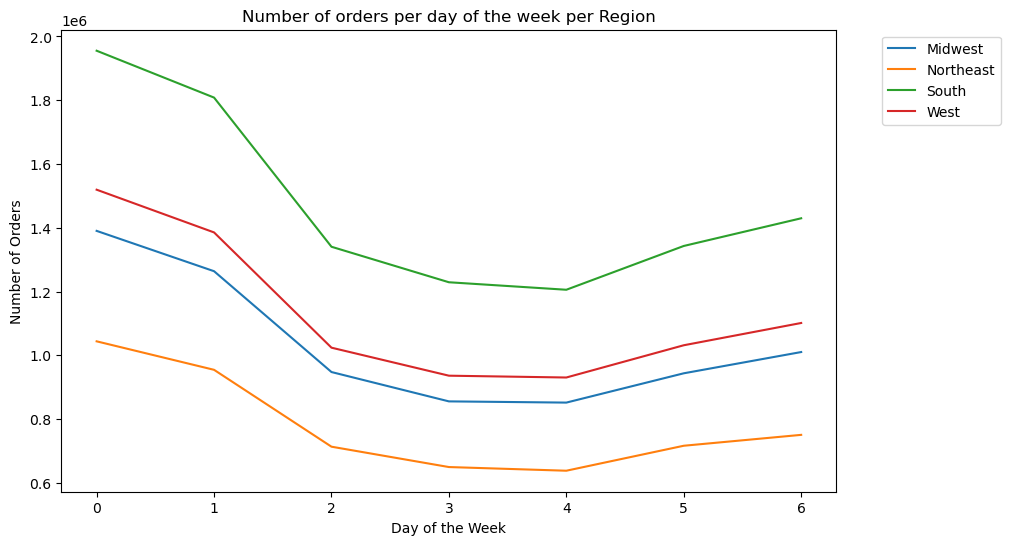

In [3]:
## Are there differences in ordering habits based on a customer's region?

# Create crosstab 
crss_day_region = pd.crosstab(index = df_all['orders_day_of_week'], columns = df_all['region'])

# Create line chart
line_day_region = crss_day_region.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per day of the week per Region')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Remove the grid
plt.grid(False)

# Export line chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habits_region.png')
plt.savefig(output_path)

# Show the line chart
plt.show()

### 5.d Is there a connection between age and family status in terms of ordering habits?

In [4]:
## Check values for both variables:

df_all['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [5]:
df_all['age_flag'].value_counts()

middle age adults    14034276
young adults          9199454
senior                7730834
Name: age_flag, dtype: int64

In [6]:
## Create a new column "family_status_combined" to replace divorced/widowed with single

df_all['fam_status_combined'] = df_all['fam_status'].replace('divorced/widowed', 'single')

In [7]:
## Check values for new column and double check no changes in fam_status column

df_all['fam_status_combined'].value_counts()

married                             21743711
single                               7739681
living with parents and siblings     1481172
Name: fam_status_combined, dtype: int64

In [8]:
df_all['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [9]:
## Create and age_flag fam_status_combined customer profile

df_all.loc[(df_all['fam_status_combined'] == 'married') & (df_all['age_flag'] == 'young adults'), 'age_group_fam_status'] = 'married young adult'

df_all.loc[(df_all['fam_status_combined'] == 'married') & (df_all['age_flag'] == 'middle age adults'), 'age_group_fam_status'] = 'married middle-aged'

df_all.loc[(df_all['fam_status_combined'] == 'married') & (df_all['age_flag'] == 'senior'), 'age_group_fam_status'] = 'married senior'

df_all.loc[(df_all['fam_status_combined'] == 'single') & (df_all['age_flag'] == 'young adults'), 'age_group_fam_status'] = 'single young adult'

df_all.loc[(df_all['fam_status_combined'] == 'single') & (df_all['age_flag'] == 'middle age adults'), 'age_group_fam_status'] = 'single middle aged'

df_all.loc[(df_all['fam_status_combined'] == 'single') & (df_all['age_flag'] == 'senior'), 'age_group_fam_status'] = 'single senior'

df_all.loc[(df_all['fam_status_combined'] == 'living with parents and siblings') & (df_all['age_flag'] == 'young adults'), 'age_group_fam_status'] = 'young adult living with family'

df_all.loc[(df_all['fam_status_combined'] == 'living with parents and siblings') & (df_all['age_flag'] == 'middle age adults'), 'age_group_fam_status'] = 'middle aged living with family'

df_all.loc[(df_all['fam_status_combined'] == 'living with parents and siblings') & (df_all['age_flag'] == 'senior'), 'age_group_fam_status'] = 'senior living with family'


In [10]:
## Check values of new column

df_all['age_group_fam_status'].value_counts()

married middle-aged               10492796
married senior                     5825113
married young adult                5425802
single middle aged                 3541480
single young adult                 2292480
single senior                      1905721
young adult living with family     1481172
Name: age_group_fam_status, dtype: int64

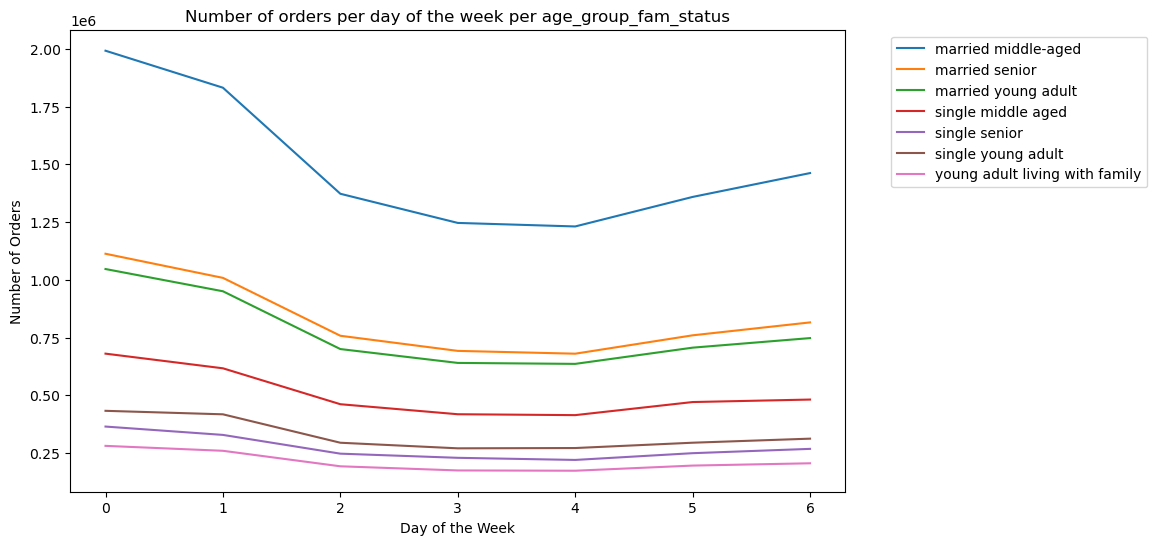

In [11]:
## Visualization for the Number of orders per day for each age-group/family status

# Create crosstab 
crss_day_age_fam = pd.crosstab(index = df_all['orders_day_of_week'], columns = df_all['age_group_fam_status'])

# Create line chart
line_day_age_fam = crss_day_age_fam.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per day of the week per age_group_fam_status')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Remove the grid
plt.grid(False)

# Export line chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habits_age_group_fam_status.png')
plt.savefig(output_path)

# Show the line chart
plt.show()

### 5.e What differences can you find in ordering habits of different customer profiles?

#### Average price of orders for age_group_fam_status profile

In [12]:
grouby_agefam_prices = df_all.groupby('age_group_fam_status').agg({'prices': ['mean']})

# Print table
grouby_agefam_prices

,prices
,mean
age_group_fam_status,
married middle-aged,7.793354
married senior,7.791746
married young adult,7.782755
single middle aged,7.790793
single senior,7.802276
single young adult,7.777051
young adult living with family,7.800604


#### Visualization for Average amount spent by Age Group and Family Status

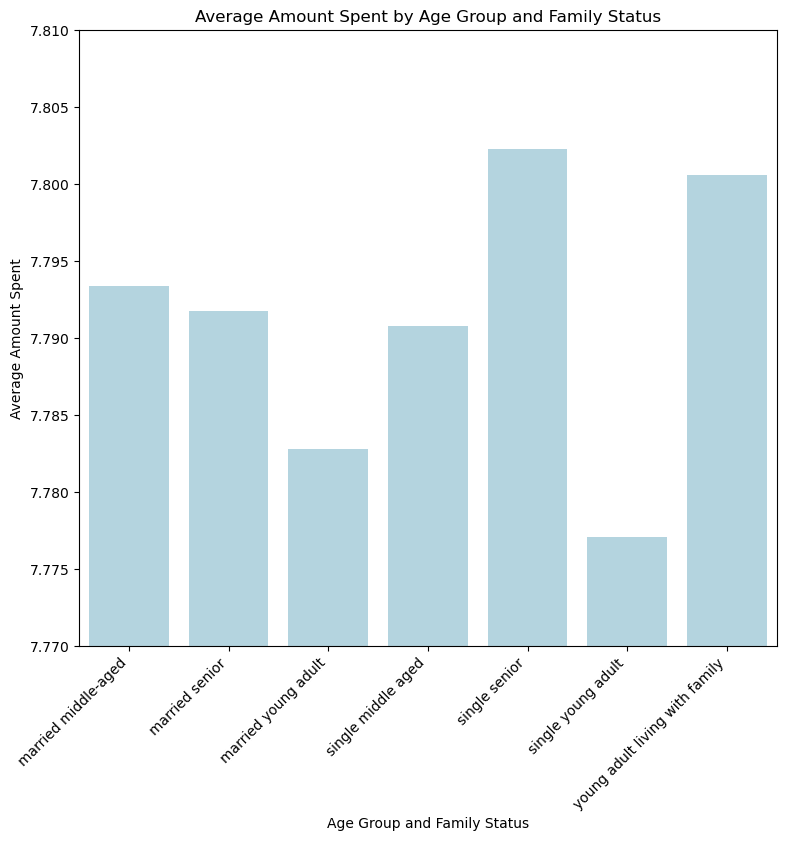

In [27]:
# Create the bar chart
plt.figure(figsize=(9, 8))
bar_chart11 = sns.barplot(data=grouby_agefam_prices, x=grouby_agefam_prices.index, y='prices', color='lightblue')

# Set title and labels
plt.title("Average Amount Spent by Age Group and Family Status")
plt.xlabel("Age Group and Family Status")
plt.ylabel("Average Amount Spent")

# Set y-axis limits
plt.ylim(7.77, 7.81)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the grid
plt.grid(False)

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'avg_spent_age_group_fam_status.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()


#### Average price of orders for age_group_class_level profile

In [28]:
groupby_ageclass_prices = df_all.groupby('age_group_class_level').agg({'prices': ['mean']})

# Print table
groupby_ageclass_prices

,prices
,mean
age_group_class_level,
lower class middle-aged,7.034133
lower class senior,6.706150
lower class young adult,7.595307
middle class middle-aged,7.961166
middle class senior,7.952928
middle class young adult,7.949952
upper class middle-aged,7.949098
upper class senior,7.958393


#### Visualization for Average amount spent by age group and class level

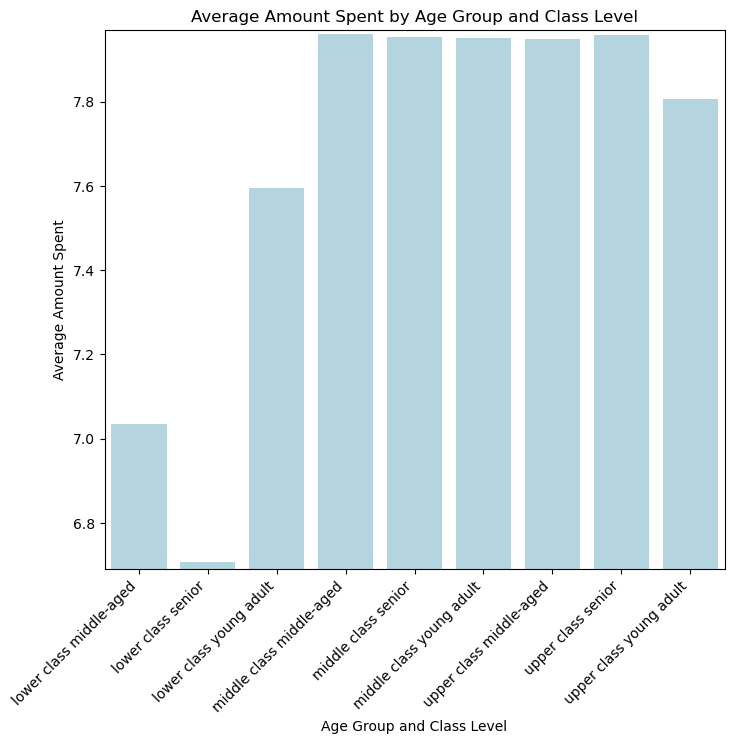

In [30]:
# Create the bar chart
plt.figure(figsize=(8, 7))
bar_chart12 = sns.barplot(data=groupby_ageclass_prices, x=groupby_ageclass_prices.index, y=('prices','mean'), color='lightblue')

# Set title and labels
plt.title("Average Amount Spent by Age Group and Class Level")
plt.xlabel("Age Group and Class Level")
plt.ylabel("Average Amount Spent")

# Set y-axis limits
plt.ylim(6.69, 7.97)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the grid
plt.grid(False)

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'avg_spent_age_group_class_level.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()

#### Most popular product by age group and family status

In [35]:
# Most bought product by age group and family status

# Group the DataFrame by 'age_group_fam_status' and 'product_name', count occurrences, and reset the index
grouped = df_all.groupby(['age_group_fam_status', 'product_name']).size().reset_index(name='count')

# Find the row with the maximum count for each 'age_group_fam_status'
result = grouped.groupby('age_group_fam_status')['product_name', 'count'].max()

# Now, 'result' contains the most bought product for each unique combination in 'age_group_fam_status'

print(result)



                                                            product_name  \
age_group_fam_status                                                       
married middle-aged             with a Splash of Pineapple Coconut Water   
married senior                  with a Splash of Pineapple Coconut Water   
married young adult             with a Splash of Pineapple Coconut Water   
single middle aged              with a Splash of Pineapple Coconut Water   
single senior                   with a Splash of Pineapple Coconut Water   
single young adult              with a Splash of Pineapple Coconut Water   
young adult living with family  with a Splash of Pineapple Coconut Water   

                                 count  
age_group_fam_status                    
married middle-aged             153904  
married senior                   84741  
married young adult              78853  
single middle aged               51994  
single senior                    27815  
single young adult          

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_94641/2823982072.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped.groupby('age_group_fam_status')['product_name', 'count'].max()


#### Visualization for most bought poduct based on age group and family status

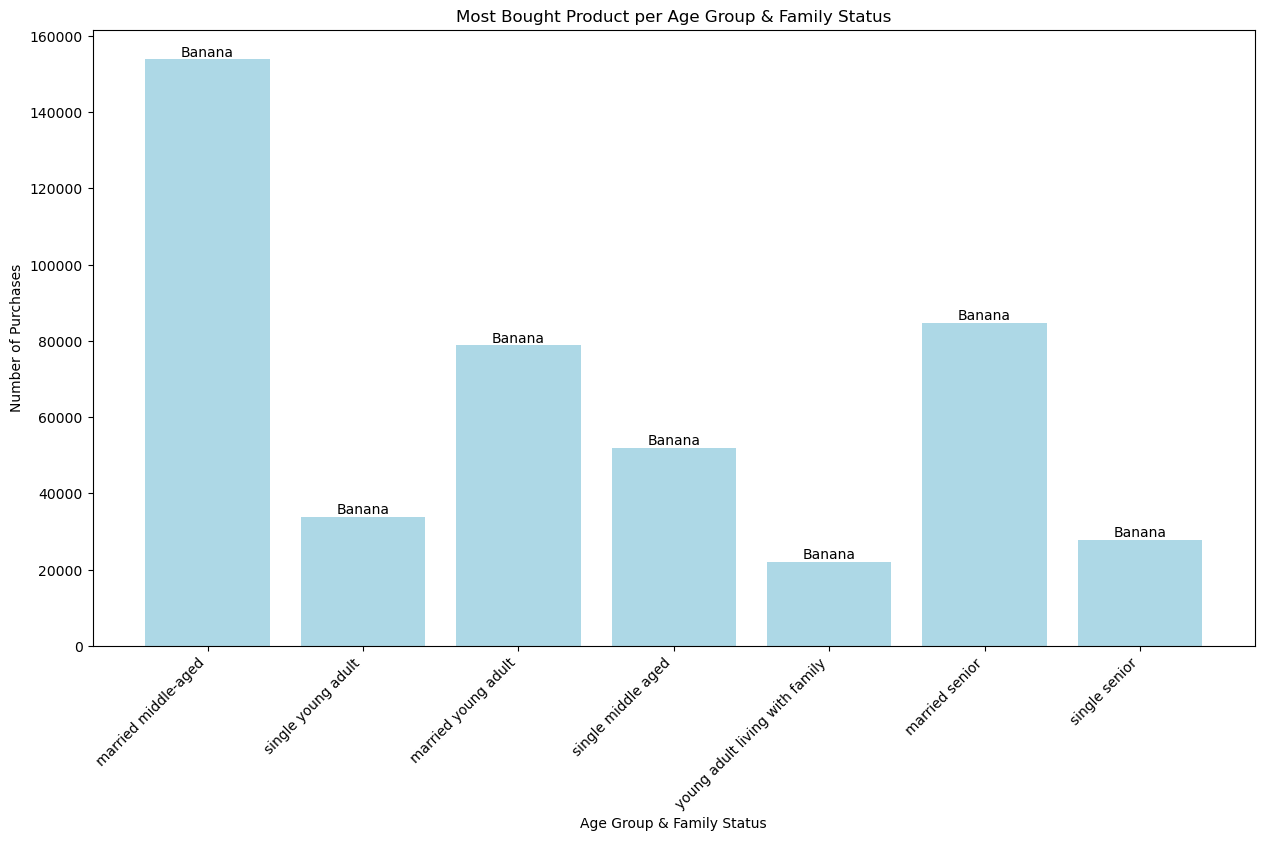

In [39]:
# Get unique age group + family status combinations
unique_age_fam_statuses = df_all['age_group_fam_status'].unique()

# Create a bar chart for each age group + family status combination
plt.figure(figsize=(15, 8))

for age_fam_status in unique_age_fam_statuses:
    most_common_product = df_all[df_all['age_group_fam_status'] == age_fam_status]['product_name'].value_counts().idxmax()
    count = df_all[df_all['age_group_fam_status'] == age_fam_status]['product_name'].value_counts()[most_common_product]
    plt.bar(age_fam_status, count, color='lightblue')
    plt.text(age_fam_status, count, most_common_product, ha='center', va='bottom', fontsize=10, color='black')

plt.title("Most Bought Product per Age Group & Family Status")
plt.xlabel("Age Group & Family Status")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'most_common_age_fam.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()


#### Most bought product by age flag with visualization

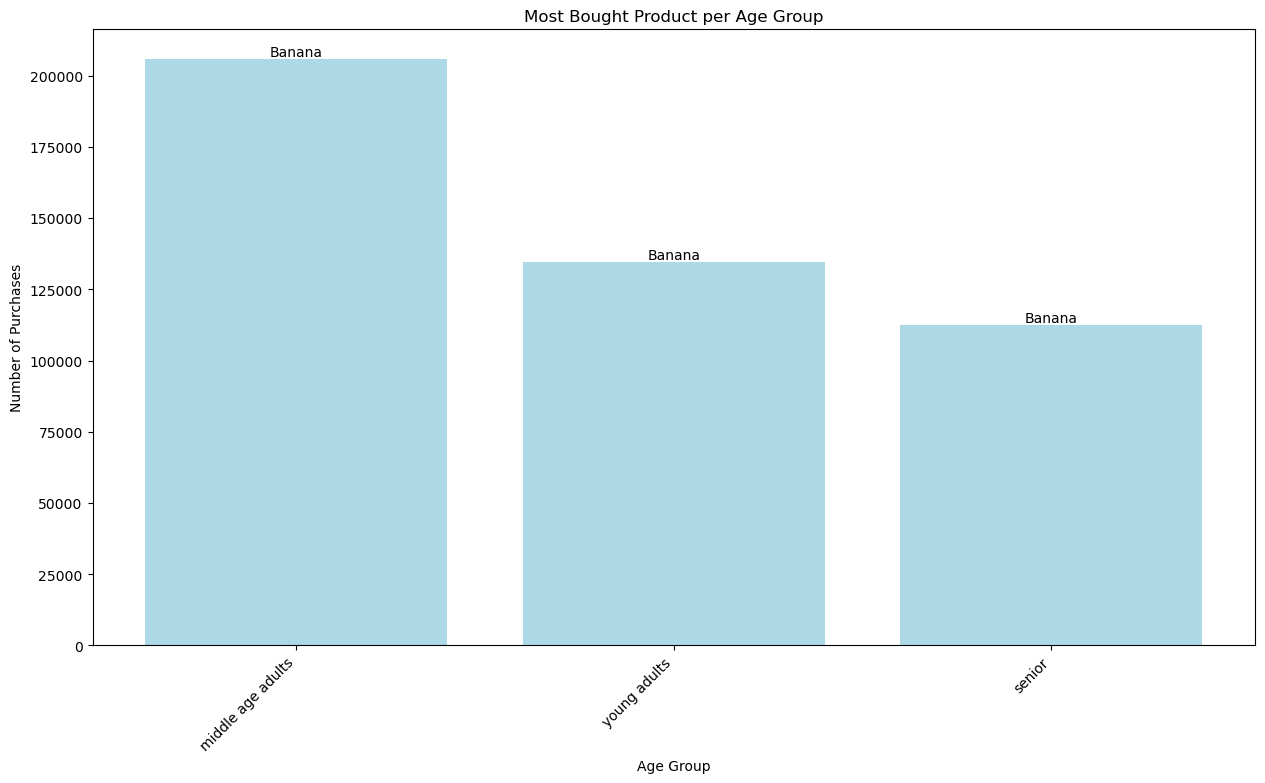

In [42]:
# Get unique age_flag values 
unique_age_flags = df_all['age_flag'].unique()

# Create a bar chart for each age flag
plt.figure(figsize=(15, 8))

for age_flag in unique_age_flags:
    most_common_product = df_all[df_all['age_flag'] == age_flag]['product_name'].value_counts().idxmax()
    count = df_all[df_all['age_flag'] == age_flag]['product_name'].value_counts()[most_common_product]
    plt.bar(age_flag, count, color='lightblue')
    plt.text(age_flag, count, most_common_product, ha='center', va='bottom', fontsize=10, color='black')

plt.title("Most Bought Product per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'most_common_age_flag.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()

#### Most bought product by age group and class level with visualization.

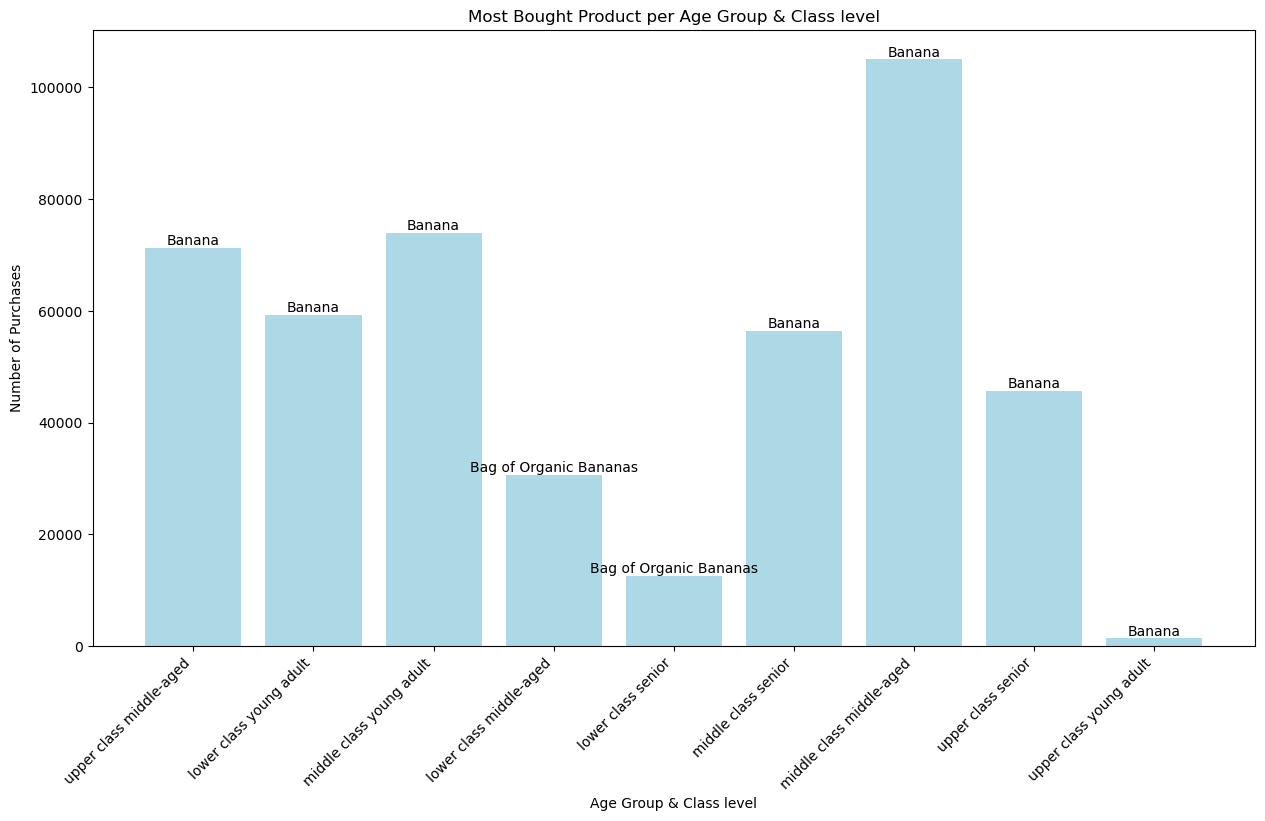

In [43]:
# Per Age group and class level

# Get unique age group class level
unique_age_group_class_levels = df_all['age_group_class_level'].unique()

# Create a bar chart for each age group + class level
plt.figure(figsize=(15, 8))

for age_group_class_level in unique_age_group_class_levels:
    most_common_product = df_all[df_all['age_group_class_level'] == age_group_class_level]['product_name'].value_counts().idxmax()
    count = df_all[df_all['age_group_class_level'] == age_group_class_level]['product_name'].value_counts()[most_common_product]
    plt.bar(age_group_class_level, count, color='lightblue')
    plt.text(age_group_class_level, count, most_common_product, ha='center', va='bottom', fontsize=10, color='black')

plt.title("Most Bought Product per Age Group & Class level")
plt.xlabel("Age Group & Class level")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'most_common_age_class.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()

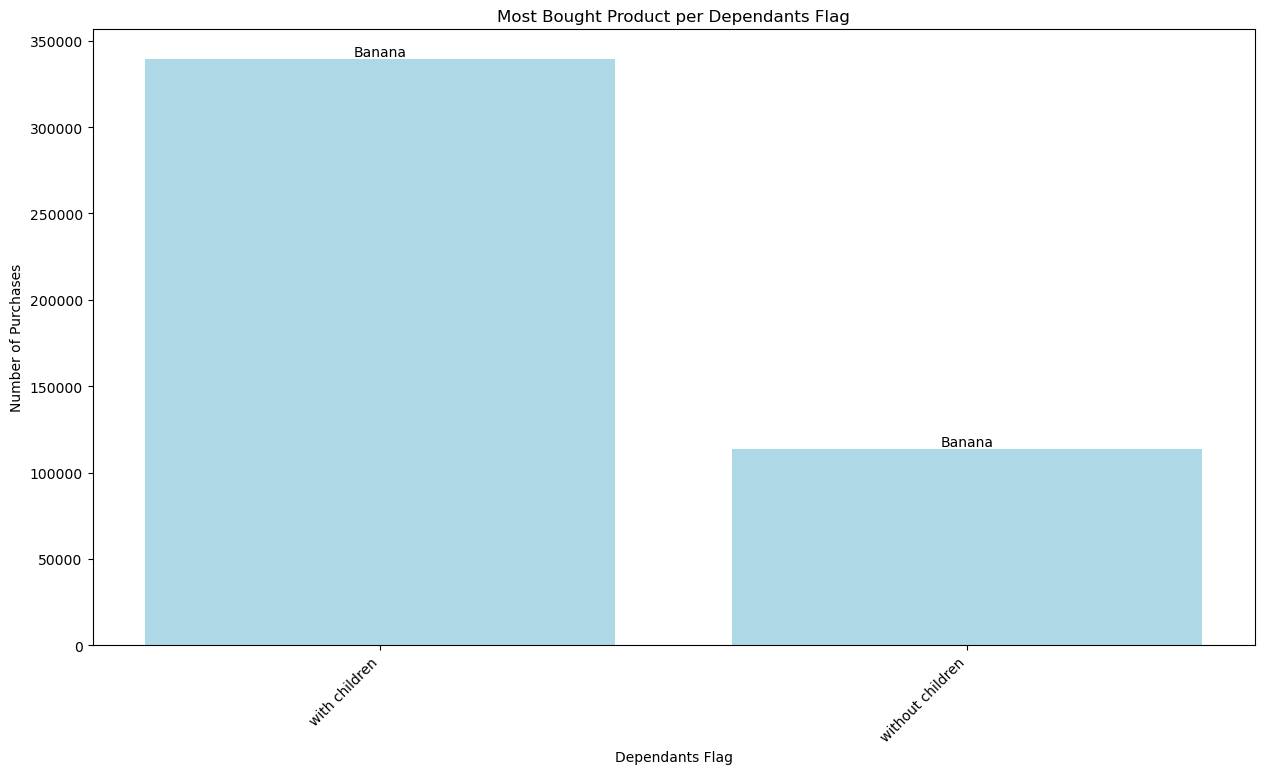

In [47]:
## Most popular product based on dependants_flag:

# Get unique 'dependants_flag' values
unique_dependants_flags = df_all['dependants_flag'].unique()

# Create a bar chart for each 'dependants_flag' value
plt.figure(figsize=(15, 8))

for dependants_flag in unique_dependants_flags:
    most_common_product = df_all[df_all['dependants_flag'] == dependants_flag]['product_name'].value_counts().idxmax()
    count = df_all[df_all['dependants_flag'] == dependants_flag]['product_name'].value_counts()[most_common_product]
    plt.bar(dependants_flag, count, color='lightblue')
    plt.text(dependants_flag, count, most_common_product, ha='center', va='bottom', fontsize=10, color='black')

plt.title("Most Bought Product per Dependants Flag")
plt.xlabel("Dependants Flag")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'most_common_dependants_flag.png')
plt.savefig(output_path)

# Show the plot
plt.show()


### Ordering habits by price range 

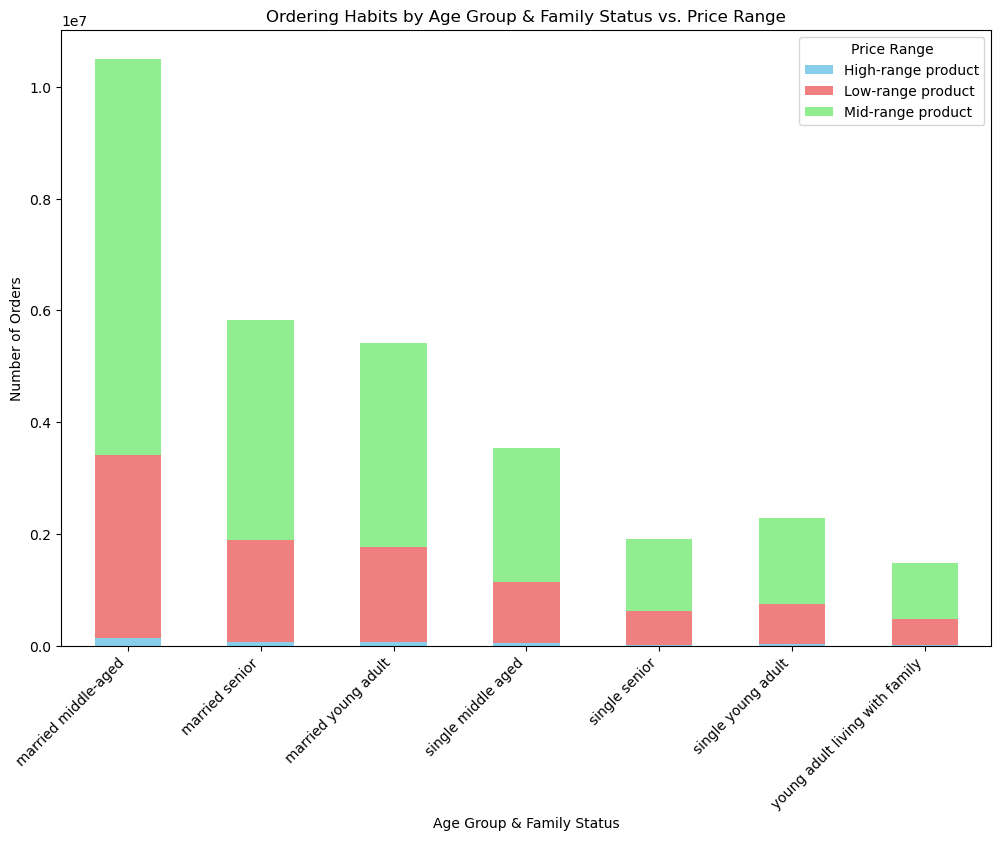

In [50]:
# Ordering habits for age_group_fam_status by price range

# Create a cross-tabulation table
ct = pd.crosstab(df_all['age_group_fam_status'], df_all['price_range_loc'])

# Define custom colors for the categories
custom_colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_colors)

plt.title("Ordering Habits by Age Group & Family Status vs. Price Range")
plt.xlabel("Age Group & Family Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right')

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_fam_price_range1.png')
plt.savefig(output_path)

# Show the plot
plt.legend(title='Price Range')
plt.show()


In [51]:
# Display the cross-tabulation table

print(ct)

price_range_loc                 High-range product  Low-range product  \
age_group_fam_status                                                    
married middle-aged                         135376            3277375   
married senior                               76083            1821020   
married young adult                          70042            1695400   
single middle aged                           44165            1104511   
single senior                                24842             595568   
single young adult                           28448             719159   
young adult living with family               18997             461807   

price_range_loc                 Mid-range product  
age_group_fam_status                               
married middle-aged                       7080045  
married senior                            3928010  
married young adult                       3660360  
single middle aged                        2392804  
single senior                 

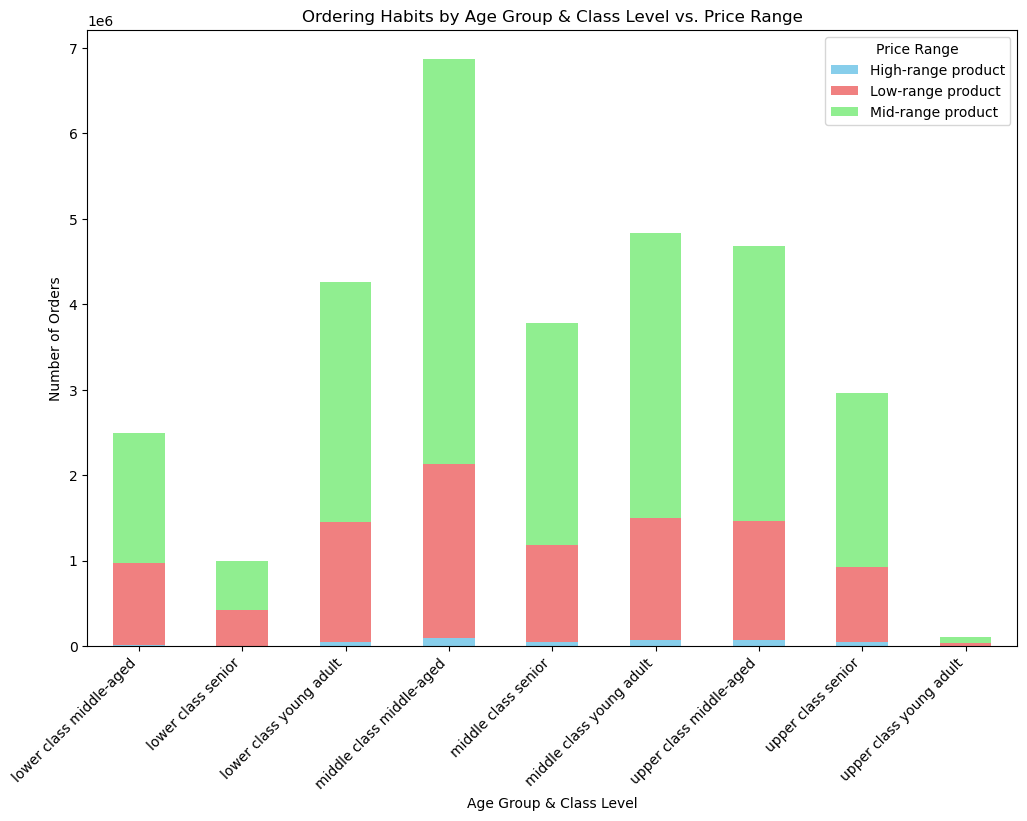

In [54]:
# Ordering habits for age_group_class_level by price range

# Create a cross-tabulation table
ct1 = pd.crosstab(df_all['age_group_class_level'], df_all['price_range_loc'])

# Define custom colors for the categories
custom_colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create a stacked bar chart
ct1.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_colors)

plt.title("Ordering Habits by Age Group & Class Level vs. Price Range")
plt.xlabel("Age Group & Class Level")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right')

# Export the bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_class_price_range.png')
plt.savefig(output_path)

# Show the plot
plt.legend(title='Price Range')
plt.show()

In [55]:
# Display the cross-tabulation table

print(ct1)

price_range_loc           High-range product  Low-range product  \
age_group_class_level                                             
lower class middle-aged                17742             953097   
lower class senior                      5232             412277   
lower class young adult                48600            1406164   
middle class middle-aged               95080            2036004   
middle class senior                    53200            1125388   
middle class young adult               66267            1437549   
upper class middle-aged                66719            1392785   
upper class senior                     42493             878923   
upper class young adult                 2620              32653   

price_range_loc           Mid-range product  
age_group_class_level                        
lower class middle-aged             1518175  
lower class senior                   578626  
lower class young adult             2801435  
middle class middle-aged        

# Export your final data set

In [56]:
df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_end.pkl'))